**Nome:** Iran Freitas Ribeiro

**Matrícula:** 2021241588

**Disciplina:** TEI - Estatística Aplicada

**Professor:** Celso José Munaro

Gere uma variável aleatória X com distribuição uniforme com 1000 amostras e intervalo [a,b] de sua escolha.

In [1]:
import scipy.stats as st
import numpy as np
import seaborn as sns
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform
sns.set_theme()

Para gerar a variável aleatória, utilizo a função abaixo.

In [2]:
np.random.seed(42)

In [3]:
# geração da variavel aleatoria
a, b = [1.0, 3.0]
X1 = np.random.uniform(low=a, high=b, size=1000)

**1. Selecione aleatoriamente $20$ amostras de $X$ e construa o intervalo de confiança para a média com $\alpha=5$%. Considere a variância conhecida, obtida da população de $1000$ amostras. Repita este procedimento e construa $50$ intervalos para a média. Plote os intervalos das médias junto com a média de $X$ e comente os resultados que obteve, comparando os intervalos estimados e verificando se eles contêm a média conhecida da população.**

Como a média é normalmente distribuída, nessa questão podemos utilizar a equação para cálculo de intervalo de confiança de uma distribuição normal, implementada na função ``CI`` a seguir, baseada na definição (8-7) do livro referência.

In [4]:
def CI(muX, sigma, n, alpha=0.05):
    """
    Calcula o intervalo de confiância de uma distribuição normal
    """
    # percentage point da distribuição normal
    # essa parte é ligeiramente diferente da definição,
    # pois zalpha_2 retorna um valor negativo
    zalpha_2  = norm.ppf(alpha/2)
    # limite superior
    ci_d = muX - zalpha_2*sigma/np.sqrt(n)
    # limite inferior
    ci_l = muX + zalpha_2*sigma/np.sqrt(n)
    return ci_l, ci_d

In [5]:
# seleciono 20 valores aleatoriamente
sampleX1 = np.random.choice(X1, size=20)
# obtenho a média da amostra
muX1 = sampleX1.mean()
# obtenho a variância da população
varX1 = X1.var()
x1 = sorted(sampleX1)

In [6]:
# calculo do intervalo de confiança
ci = CI(muX1, np.sqrt(varX1), 20, alpha=0.05)

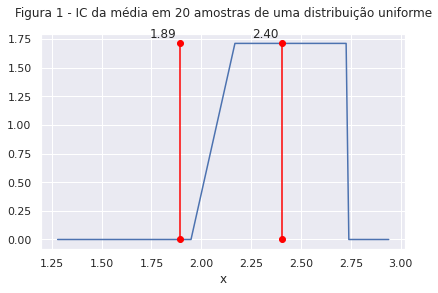

In [7]:
fig, ax = plt.subplots()
pdf_1 = uniform.pdf(x1, loc=muX1, scale=X1.std())
ax.plot(x1, pdf_1, 'b')
ie = [ci[0],ci[0]]
id = [ci[1],ci[1]]
ye = [0,np.max(pdf_1)]
ax.plot(ie,ye,marker='o', color='red')
ax.plot(id,ye,marker='o', color='red')
ax.set_title("Figura {} - IC da média em 20 amostras de uma distribuição uniforme".format(1), y=1.05)
ax.text(ci[0]-0.15, np.max(pdf_1)+0.05, "{:.2f}".format(ci[0]))
ax.text(ci[1]-0.15, np.max(pdf_1)+0.05, "{:.2f}".format(ci[1]))
plt.tight_layout()
ax.set_xlabel("x");

Média da distribuição uniforme gerada:

In [11]:
X1.mean()

1.9805131066402673

A Figura $1$, acima, apresenta o intervalo de confiança (IC) para as 20 amostras selecionadas aleatoriamente, representado pelas duas barras vermelhas, de uma distribuição uniforme entre $1.0$ e $3.0$. A figura sugere que a probabilade da média da distribuição estar entre $1.89$ e $2.40$ é de $0.95$. De fato, a média de $X$, que é 2.14, está dentro do intervalo obtido, mas para uma maior confiabilidade no resultado, repetimos o cálculo mais vezes, como será feito a seguir.

In [13]:
n = 50
# gero 20 amostras 50 vezes
amostras_X1 = [np.random.choice(X1, size=20) for _ in range(n)]
std_X1 = np.sqrt(varX1)
# calculo os intervalos de cada amostra
n_intervalos_1 = [CI(amostras_X1[i].mean(), std_X1, 20, alpha=0.05) for i in range(n)]

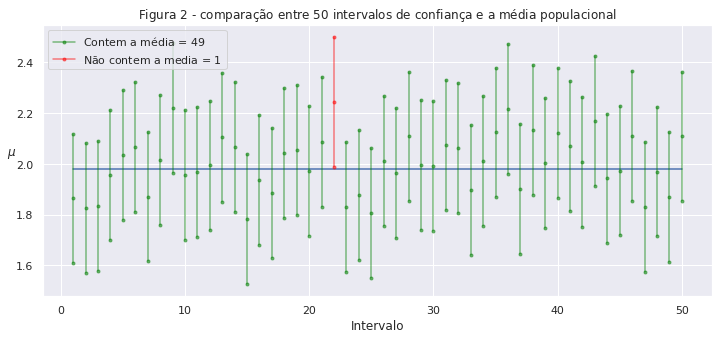

In [14]:
fig, ax = plt.subplots(figsize=(12,5))
muPop = X1.mean()
y = [muPop for _ in range(n)]
intervalos = np.arange(1,51)
ax.plot(intervalos, y)
cnts=0
for i in intervalos:
    ypoints = [n_intervalos_1[i-1][0], np.mean(n_intervalos_1[i-1]), n_intervalos_1[i-1][1]]
    if (muPop>=ypoints[0] and muPop <=ypoints[-1]):
        linha_com_media, = ax.plot([i,i,i], ypoints, marker='.', c='green', alpha=0.5,)
        cnts+=1
    else:
        linha_sem_media, = ax.plot([i,i,i], ypoints, marker='.', c='red', alpha=0.5,)
ax.set_title("Figura {} - comparação entre $50$ intervalos de confiança e a média populacional".format(2))
labels = ["Contem a média = ${}$".format(cnts), "Não contem a media = ${}$".format(n-cnts)]
ax.legend([linha_com_media, linha_sem_media], labels)
ax.set_xlabel("Intervalo")
ax.set_ylabel("$\mu$",rotation=0);

A Figura 2 mostra que, dos intervalos calculados, apenas $1$ ($2\%$) não contém a média populacional. Como assumimos que a distribuição da média é normal e calculamos um intervalo de confiança de $95\%$, era esperado que $95\%$ dos intervalos contivessem a média populacional. Nesse caso, a porcentagem foi maior, com $98\%$ dos intervalos calculados contendo a média populacional.

**2. Plote o histograma cumulativo das $50$ médias calculadas e compare com a cdf teórica da média amostral de $X$.**

Para fazer este item: (i) computamos a média de cada amostra; (ii) obtemos a média e desvio padrão amostral; (iii) e criamos uma distribuição normal com os dois parâmetros e; (iv) calculamos a cdf da distribuição normal. Esses passos estão no código a seguir:

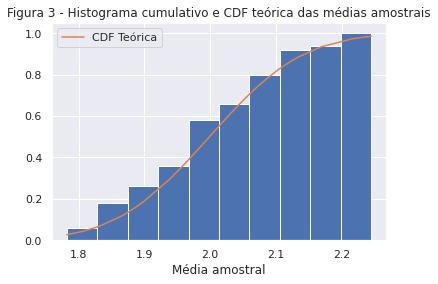

In [15]:
# (i)
medias = [xi.mean() for xi in amostras_X1]
# (ii)
mu, sigma = [np.mean(medias), np.std(medias)]
# (iii)
norm_medias = np.random.normal(loc=mu, scale=sigma, size=50)
# (iv)
cdf_teorica = [norm.cdf(xi, loc=mu, scale=sigma) for xi in sorted(medias)]
fig, ax = plt.subplots()
ax.hist(medias,cumulative=True, density=True)
ax.plot(sorted(medias), cdf_teorica, label="CDF Teórica")
ax.set_xlabel("Média amostral")
ax.set_title("Figura {} - Histograma cumulativo e CDF teórica das médias amostrais".format(3))
ax.legend();

**3. Repita a atividade $1$ considerando a variância desconhecida e compare os intervalos**

In [17]:
def CI_2(muX, s, n, alpha=0.05):
    """
    Calcula o intervalo de confiância de uma distribuição normal
    com variância desconhecida.
    """
    # percentage point da distribuição t
    zalpha_2  = st.t.ppf(alpha/2, df=(n-1))
    # limite superior
    ci_d = muX - zalpha_2*s/np.sqrt(n)
    # limite inferior 
    ci_l = muX + zalpha_2*s/np.sqrt(n)
    return ci_l, ci_d

Como a variância é desconhecida, pode-se utilizar a variância amostral. A partir da definição (8-18) do livro referência, tem-se a função ``CI_2``. Assim, para o primeiro caso (um único intervalo):

In [18]:
# escolhe 20 valores de X aleatoriamente
sampleX_3 = np.random.choice(X1,size=20)
# usa variancia da amostra, nesse caso, desvio padrão p/ obter o intervalo
ci_3uni = CI_2(sampleX_3.mean(), sampleX_3.std(), 20, alpha=0.05)

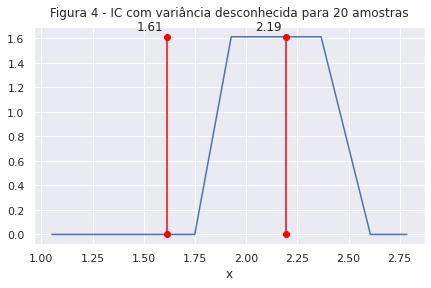

In [19]:
fig, ax = plt.subplots(figsize=(7,4))
x_3 = sorted(sampleX_3)
pdf_3 = uniform.pdf(x_3, loc=sampleX_3.mean(), scale=sampleX_3.std())
ax.plot(x_3, pdf_3)
# cnfidence interval esquerdo
one_x12, one_y12 = [ci_3uni[0], ci_3uni[0]], [0, np.max(pdf_3)]
# cnfidence interval direito
two_x12, two_y12 = [ci_3uni[1], ci_3uni[1]], [0, np.max(pdf_3)]
ax.plot(one_x12, one_y12, two_x12, two_y12, marker = 'o', color='red')
ax.set_xlabel("x")
ax.text(ci_3uni[0]-0.15, np.max(pdf_3)+0.05, "{:.2f}".format(ci_3uni[0]))
ax.text(ci_3uni[1]-0.15, np.max(pdf_3)+0.05, "{:.2f}".format(ci_3uni[1]))
ax.set_title("Figura {} - IC com variância desconhecida para 20 amostras".format(4), y=1.02);

A Figura $4$ mostra que, considerando a variância desconhecida, o intervalo calculado contém a média populacional. Para verificar se isso ocorre na proporção esperada (isto é, pelo menos $95\%$ das vezes) calculamos, novamente, $50$ intervalos de $20$ amostras aleatórias.

In [22]:
n = 50
n_intervalos_3 = []
# obtem 20 amostras, 50 vezes
amostras = [np.random.choice(X1, size=20) for i in range(50)]    
# desvio padrão amostral
std_amostral = np.std(amostras)
n_intervalos_3 = [CI_2(Xi.mean(), std_amostral, 20, alpha=0.05) for Xi in amostras]

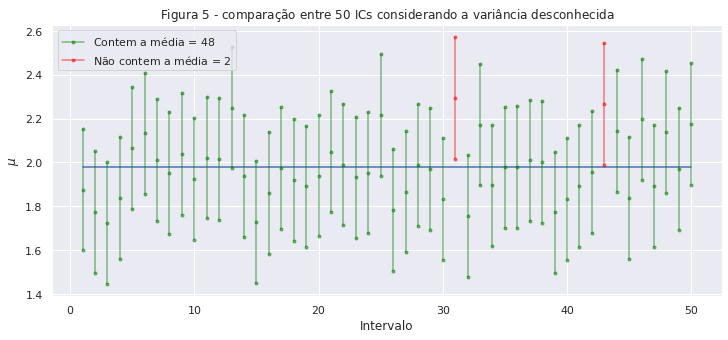

In [23]:
fig, ax = plt.subplots(figsize=(12,5))
muPop = X1.mean()
y = [muPop for _ in range(n)]
intervalos = np.arange(1,51)
ax.plot(intervalos, y)
cnts = 0
for i in intervalos:
    ypoints = [n_intervalos_3[i-1][0], np.mean(n_intervalos_3[i-1]), n_intervalos_3[i-1][1]]
    if (muPop>=ypoints[0] and muPop<=ypoints[-1]):
        linha_com_media, = ax.plot([i,i,i], ypoints, marker='.', c='green', alpha=0.5,)
        cnts+=1
    else:
        linha_sem_media, = ax.plot([i,i,i], ypoints, marker='.', c='red', alpha=0.5,)
    #ax.plot([i,i,i], ypoints, marker='.', c='blue', alpha=0.5)
labels = ["Contem a média = ${}$".format(cnts), "Não contem a média = ${}$".format(n-cnts)]
ax.set_xlabel("Intervalo")
ax.set_ylabel("$\mu$")
ax.legend([linha_com_media, linha_sem_media], labels)
ax.set_title("Figura {} - comparação entre $50$ ICs considerando a variância desconhecida".format(5));

Nota-se, na Figura $5$, que apenas $2$ intervalos não contém a média populacional. Esse resultado confirma que, mesmo quando a variância populacional é desconhecida, o intervalo de confiança obtido ainda contém a média populacional, ao menos $95\%$ das vezes. Nesse caso, os intervalos contém a média em $96\%$ das vezes. Além disso, nota-se que os dois intervalos que não contém a média possuem limites bem próximos dela.

**4. Repita a atividade $1$ fazendo um intervalo de confiança para a variância da variável $X$ gerada com distribuição normal, média $\mu$ e variância $\sigma$ escolhidas. Faça o histograma das $50$ variâncias e analise.**

In [41]:
def CI_Var(n, s2, alpha=0.05):
    """
    Calcula o intervalo de confiança da variância de uma distribuição normal
    """
    # percentage point da distribuição qui2 com n-1 graus de liberdade
    x2_right = st.chi2.ppf(alpha/2, df=(n-1))
    x2_left  = st.chi2.ppf(1-(alpha/2), df=(n-1))
    # limite inferior
    ci_l = ((n-1)*s2)/x2_left
    # limite superior
    ci_r = ((n-1)*s2)/x2_right
    return ci_l, ci_r

A função a seguir gera uma variável com $1000$ amostras de uma distribuição normal padrão ($\mu=0$ e $\sigma=1$)

In [25]:
X_norm = norm.rvs(loc=.0, scale=1, size=1000)

In [38]:
# seleciono 20 valores aleatoriamente
sampleX_norm = np.random.choice(X_norm, size=20)
muX = sampleX_norm.mean()
s2_X = sampleX_norm.var()
x = sorted(sampleX_norm)

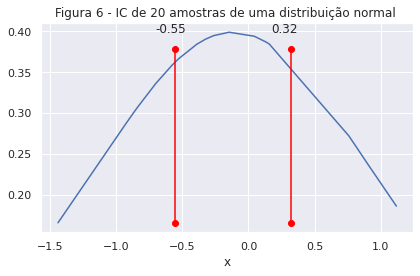

In [27]:
fig, ax = plt.subplots()
pdf_4 = norm.pdf(x, loc=muX, scale=1)
ax.plot(x,pdf_4)
ci = CI(muX, 1, 20, alpha=.05)
lim_inf, lim_sup = [np.min(pdf_4), np.max(pdf_4)]
one_x12, one_y12 = [ci[0], ci[0]], [lim_inf, lim_sup-0.02]
two_x12, two_y12 = [ci[1], ci[1]], [lim_inf, lim_sup-0.02]
ax.plot(one_x12, one_y12, two_x12, two_y12, marker = 'o', color='red')
ax.set_xlabel("x")
ax.set_title("Figura {} - IC de 20 amostras de uma distribuição normal ".format(6))
ax.text(ci[0]-0.15, lim_sup, "{:.2f}".format(ci[0]))
ax.text(ci[1]-0.15, lim_sup, "{:.2f}".format(ci[1]))
plt.tight_layout();

A Figura $6$ apresenta o intervalo de confiança (IC) para $20$ amostras selecionadas de uma distribuição normal com $\mu=0.0$ e $\sigma=1.0$. Para essa amostra, o intervalo está compreendido entre $-0.55$ e $0.32$. Nesse caso, nota-se que a média ($0$) está contida no intervalo calculado. Assim como anteriormente, verificamos se esse resultado se mantém na proporção esperada, realizando o mesmo experimento um certo número de vezes ($50$).

In [50]:
n = 50
amostras4 = [np.random.choice(X_norm, size=20) for _ in range(n)]
n_intervalos_normal = [CI_Var(20, xsample.var(), alpha=0.05) for xsample in amostras4]

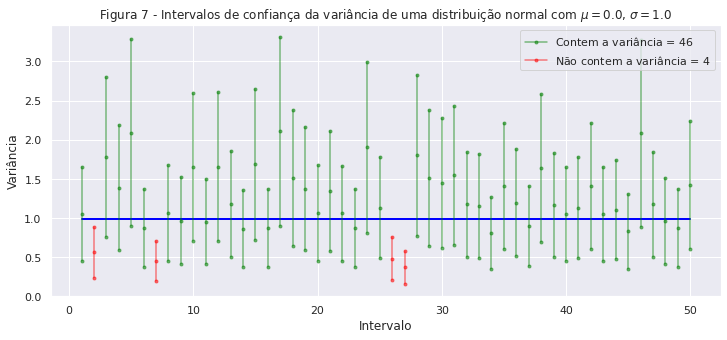

In [51]:
fig, ax = plt.subplots(figsize=(12,5))
var_norm = X_norm.var()
y = [var_norm for _ in range(n)]
intervalos = np.arange(1,51)
ax.plot(intervalos, y,c='blue',lw=2)
cnts = 0
for i in intervalos:
    ypoints = [n_intervalos_normal[i-1][0], np.mean(n_intervalos_normal[i-1]), n_intervalos_normal[i-1][1]]
    if (var_norm>=ypoints[0] and var_norm<=ypoints[-1]):
        linha_com_media, = ax.plot([i,i,i], ypoints, marker='.', c='green', alpha=0.5,)
        cnts+=1
    else:
        linha_sem_media, = ax.plot([i,i,i], ypoints, marker='.', c='red', alpha=0.5,)
labels = ["Contem a variância = ${}$".format(cnts), "Não contem a variância = ${}$".format(n-cnts)]
ax.legend([linha_com_media, linha_sem_media], labels)
ax.set_title("Figura {} - Intervalos de confiança da variância de uma distribuição normal com $\mu={}$, $\sigma={}$".format(7, 0.0, 1.0))
ax.set_xlabel("Intervalo")
ax.set_ylabel("Variância");

Para verificar que se os intervalos de confiança contém a variância populacional, comparamos $50$ intervalos de confiança na Figura $7$. Nota-se que $46$ dos $50$ intervalos obtidos contém a variância populacional, ou seja, $92\%$ dos intervalos. Não é o resultado esperado ($95\%$), mas é um valor muito próximo. Caso um número maior de experimentos fosse realizado essa porcentagem chegaria próxima do valor esperado. Para mostrar isso, realizamos um número maior de testes ($200$) a seguir:

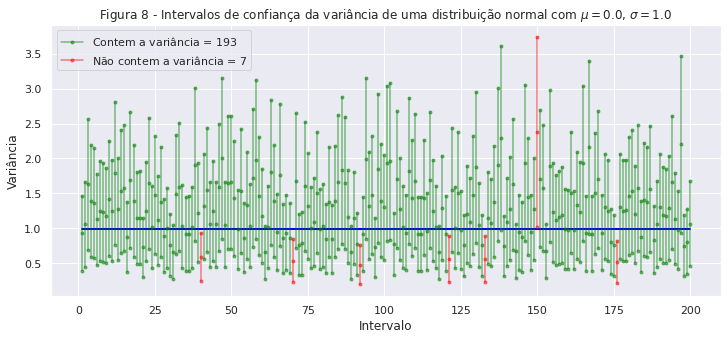

In [48]:
n = 200
amostras4 = [np.random.choice(X_norm, size=20) for _ in range(n)]
n_intervalos_normal = [CI_Var(20, xsample.var(), alpha=0.05) for xsample in amostras4]
fig, ax = plt.subplots(figsize=(12,5))
var_norm = X_norm.var()
y = [var_norm for _ in range(n)]
intervalos = np.arange(1,n+1)
ax.plot(intervalos, y,c='blue',lw=2)
cnts = 0
for i in intervalos:
    ypoints = [n_intervalos_normal[i-1][0], np.mean(n_intervalos_normal[i-1]), n_intervalos_normal[i-1][1]]
    if (var_norm>=ypoints[0] and var_norm<=ypoints[-1]):
        linha_com_media, = ax.plot([i,i,i], ypoints, marker='.', c='green', alpha=0.5,)
        cnts+=1
    else:
        linha_sem_media, = ax.plot([i,i,i], ypoints, marker='.', c='red', alpha=0.5,)
labels = ["Contem a variância = ${}$".format(cnts), "Não contem a variância = ${}$".format(n-cnts)]
ax.legend([linha_com_media, linha_sem_media], labels)
ax.set_title("Figura {} - Intervalos de confiança da variância de uma distribuição normal com $\mu={}$, $\sigma={}$".format(8, 0.0, 1.0))
ax.set_xlabel("Intervalo")
ax.set_ylabel("Variância");

A Figura 8 mostra que $193$ de $200$ intervalos contém a variância populacional, ou seja $96.5\%$, confirmando a proporção esperada de pelo menos $95\%$.

In [44]:
# variância de cada amostra
variancias = [xsample.var() for xsample in amostras4]

A Figura $9$ mostra a o histograma das $50$ variâncias de $20$ amostras selecionadas aleatoriamente da distribuição normal. A figura mostra que as variâncias ocorrem em maior proporção entre $0.5$ e $1.25$, com uma proporção menor de variâncias maiores que $1.25$.

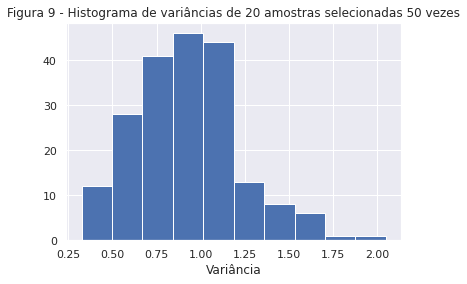

In [45]:
fig, ax = plt.subplots()
ax.hist(variancias)
ax.set_title("Figura {} - Histograma de variâncias de 20 amostras selecionadas 50 vezes".format(9))
ax.set_xlabel("Variância");

**5. Um fabricante de equipamentos seleciona aleatoriamente $1200$ unidades e verifica que 8 têm defeito**

- 5.1 Construa um intervalo de confiança de 95% para a proporção de unidades com defeito

O problema consiste em se obter o intervalo de confiança para a proporção de $8$ em $1200$ unidades com defeito. Como $n=1200$ é grande, pode-se estimar o intervalo de confiança com a definiçao (8-25) da referência utilizada em aula. O cálculo desse intervalo está implementado na função ``CI_p``.

In [46]:
def CI_p(cnts, n, alpha):
    """
    Intervalo de confiança de uma proporção
    """
    # proporção
    p = cnts/n
    # percentage point da distribuição normal
    zalpha_2  = norm.ppf(alpha/2)
    ## intervalos
    # limite superior
    ci_d = p - zalpha_2 * np.sqrt(p*(1-p)/n)
    # limite inferior
    ci_l = p + zalpha_2 * np.sqrt(p*(1-p)/n)
    return ci_l, ci_d

In [47]:
CI_p(8, 1200, 0.05)

(0.0020624119343427864, 0.011270921398990549)

O intervalo de confiança é de $0.002$ e $0.011$ para a proporção de unidades com defeito.

- 5.2 Há evidências para suportar a afirmação de que a fração de peças com defeito é menor que 1%?

Não há evidências para suportar esta afirmação, dado que o limite superior do intervalo de confiança passa, ainda que pouco, de $1\%$ ($0.0112\%$, ou seja, $\approx1.1$). Essa afirmação poderia ser verificada com maior certeza caso um número grande de lotes de $1200$ unidades tenham o intervalo de confiança obtidos e eles tenham limite superior menor que $0.01$. Com um único teste não é possível afirmar muita coisa sobre as peças.